In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [24]:
original_genres_data = pd.read_csv('data/genres_v2.csv')

/home/user/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [2]:
genres_data = pd.read_csv('data/genres_v2.csv')

/home/user/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
genres_data.head()

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.831   0.814    2    -7.364     1       0.4200        0.0598   
1         0.719   0.493    8    -7.230     1       0.0794        0.4010   
2         0.850   0.893    5    -4.783     1       0.0623        0.0138   
3         0.476   0.781    0    -4.710     1       0.1030        0.0237   
4         0.798   0.624    2    -7.668     1       0.2930        0.2170   

   instrumentalness  liveness  valence  ...                      id  \
0          0.013400    0.0556   0.3890  ...  2Vc6NJ9PW9gD9q343XFRKx   
1          0.000000    0.1180   0.1240  ...  7pgJBLVz5VmnL7uGHmRj6p   
2          0.000004    0.3720   0.0391  ...  0vSWgAlfpye0WCGeNmuNhy   
3          0.000000    0.1140   0.1750  ...  0VSXnJqQkwuH2ei1nOQ1nu   
4          0.000000    0.1660   0.5910  ...  4jCeguq9rMTlbMmPHuO7S3   

                                    uri  \
0  spotify:track:2Vc6NJ9PW9gD9q343XFRKx   
1  spotify:track:7pgJBLVz5VmnL7uGHmRj6p   
2  spotify:track:0vSWgAlfpye0WCGeNmuNhy   
3  spotify:track:0VSXnJqQkwuH2ei1nOQ1nu   
4  spotify:track:4jCeguq9rMTlbMmPHuO7S3   

                                          track_href  \
0  https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...   
1  https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...   
2  https://api.spotify.com/v1/tracks/0vSWgAlfpye0...   
3  https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...   
4  https://api.spotify.com/v1/tracks/4jCeguq9rMTl...   

                                        analysis_url duration_ms  \
0  https://api.spotify.com/v1/audio-analysis/2Vc6...      124539   
1  https://api.spotify.com/v1/audio-analysis/7pgJ...      224427   
2  https://api.spotify.com/v1/audio-analysis/0vSW...       98821   
3  https://api.spotify.com/v1/audio-analysis/0VSX...      123661   
4  https://api.spotify.com/v1/audio-analysis/4jCe...      123298   

  time_signature      genre                                      song_name  \
0              4  Dark Trap                            Mercury: Retrograde   
1              4  Dark Trap                                      Pathology   
2              4  Dark Trap                                       Symbiote   
3              3  Dark Trap  ProductOfDrugs (Prod. The Virus and Antidote)   
4              4  Dark Trap                                          Venom   

  Unnamed: 0 title  
0        NaN   NaN  
1        NaN   NaN  
2        NaN   NaN  
3        NaN   NaN  
4        NaN   NaN  

[5 rows x 22 columns]

In [4]:
genres_data.shape

(42305, 22)

In [5]:
genres_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42305 entries, 0 to 42304
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      42305 non-null  float64
 1   energy            42305 non-null  float64
 2   key               42305 non-null  int64  
 3   loudness          42305 non-null  float64
 4   mode              42305 non-null  int64  
 5   speechiness       42305 non-null  float64
 6   acousticness      42305 non-null  float64
 7   instrumentalness  42305 non-null  float64
 8   liveness          42305 non-null  float64
 9   valence           42305 non-null  float64
 10  tempo             42305 non-null  float64
 11  type              42305 non-null  object 
 12  id                42305 non-null  object 
 13  uri               42305 non-null  object 
 14  track_href        42305 non-null  object 
 15  analysis_url      42305 non-null  object 
 16  duration_ms       42305 non-null  int64 

In [7]:
genres_data.describe().transpose()

count           mean            std           min  \
danceability      42305.0       0.639364       0.156617      0.065100   
energy            42305.0       0.762516       0.183823      0.000243   
key               42305.0       5.370240       3.666145      0.000000   
loudness          42305.0      -6.465442       2.941165    -33.357000   
mode              42305.0       0.549462       0.497553      0.000000   
speechiness       42305.0       0.136561       0.126168      0.022700   
acousticness      42305.0       0.096160       0.170827      0.000001   
instrumentalness  42305.0       0.283048       0.370791      0.000000   
liveness          42305.0       0.214079       0.175576      0.010700   
valence           42305.0       0.357101       0.233200      0.018700   
tempo             42305.0     147.474056      23.844623     57.967000   
duration_ms       42305.0  250865.846685  102957.713571  25600.000000   
time_signature    42305.0       3.972580       0.268342      1.000000   
Unnamed: 0        20780.0   10483.970645    6052.359519      0.000000   

                           25%           50%         75%         max  
danceability           0.52400       0.64600       0.766       0.988  
energy                 0.63200       0.80300       0.923       1.000  
key                    1.00000       6.00000       9.000      11.000  
loudness              -8.16100      -6.23400      -4.513       3.148  
mode                   0.00000       1.00000       1.000       1.000  
speechiness            0.04910       0.07550       0.193       0.946  
acousticness           0.00173       0.01640       0.107       0.988  
instrumentalness       0.00000       0.00594       0.722       0.989  
liveness               0.09960       0.13500       0.294       0.988  
valence                0.16100       0.32200       0.522       0.988  
tempo                129.93100     144.97300     161.464     220.290  
duration_ms       179840.00000  224760.00000  301133.000  913052.000  
time_signature         4.00000       4.00000       4.000       5.000  
Unnamed: 0          5255.75000   10479.50000   15709.250   20999.000

In [9]:
genres_data['title'].isnull().count()

42305

In [12]:
genres_data['Unnamed: 0'].isnull().count()

42305

# Cleaning Data

**Removing the 'title' and the 'Unnamed: 0' columns because they only contain null values**

In [11]:
genres_data.drop('title', axis=1, inplace=True)

In [13]:
genres_data.drop('Unnamed: 0', axis=1, inplace=True)

Removing columns that have no impact for the genre

**Checking the 'id' column**

In [16]:
genres_data['id']

0        2Vc6NJ9PW9gD9q343XFRKx
1        7pgJBLVz5VmnL7uGHmRj6p
2        0vSWgAlfpye0WCGeNmuNhy
3        0VSXnJqQkwuH2ei1nOQ1nu
4        4jCeguq9rMTlbMmPHuO7S3
                  ...          
42300    46bXU7Sgj7104ZoXxzz9tM
42301    0he2ViGMUO3ajKTxLOfWVT
42302    72DAt9Lbpy9EUS29OzQLob
42303    6HXgExFVuE1c3cq9QjFCcU
42304    6MAAMZImxcvYhRnxDLTufD
Name: id, Length: 42305, dtype: object

In [17]:
genres_data.drop('id', axis=1, inplace=True)

**Checking the 'uri' column**

In [19]:
genres_data['uri'][0]

'spotify:track:2Vc6NJ9PW9gD9q343XFRKx'

Seems like the uri is assembled like this: spotify:track:id

In [20]:
genres_data.drop('uri', axis=1, inplace=True)

**Checking the 'track_href' column**

In [21]:
genres_data['track_href']

0        https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...
1        https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...
2        https://api.spotify.com/v1/tracks/0vSWgAlfpye0...
3        https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...
4        https://api.spotify.com/v1/tracks/4jCeguq9rMTl...
                               ...                        
42300    https://api.spotify.com/v1/tracks/46bXU7Sgj710...
42301    https://api.spotify.com/v1/tracks/0he2ViGMUO3a...
42302    https://api.spotify.com/v1/tracks/72DAt9Lbpy9E...
42303    https://api.spotify.com/v1/tracks/6HXgExFVuE1c...
42304    https://api.spotify.com/v1/tracks/6MAAMZImxcvY...
Name: track_href, Length: 42305, dtype: object

In [22]:
genres_data['track_href'][0]

'https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD9q343XFRKx'

In [23]:
track_hrefs = genres_data['track_href']
track_hrefs.head()

0    https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...
1    https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...
2    https://api.spotify.com/v1/tracks/0vSWgAlfpye0...
3    https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...
4    https://api.spotify.com/v1/tracks/4jCeguq9rMTl...
Name: track_href, dtype: object

In [25]:
track_href_without_url = track_hrefs.apply(lambda url: url.replace('https://api.spotify.com/v1/tracks/', ''))

In [26]:
track_href_without_url.head()

0    2Vc6NJ9PW9gD9q343XFRKx
1    7pgJBLVz5VmnL7uGHmRj6p
2    0vSWgAlfpye0WCGeNmuNhy
3    0VSXnJqQkwuH2ei1nOQ1nu
4    4jCeguq9rMTlbMmPHuO7S3
Name: track_href, dtype: object

In [51]:
(track_href_without_url == original_genres_data['id']).sum() == track_href_without_url.count()

True

Seems like the 'track_href' column is assembled by appending the id on the end of "https://api.spotify.com/v1/tracks/"

In [34]:
genres_data.drop('track_href', axis=1, inplace=True)

**Analyzing 'analysis_url' column**

In [36]:
genres_data['analysis_url']

0        https://api.spotify.com/v1/audio-analysis/2Vc6...
1        https://api.spotify.com/v1/audio-analysis/7pgJ...
2        https://api.spotify.com/v1/audio-analysis/0vSW...
3        https://api.spotify.com/v1/audio-analysis/0VSX...
4        https://api.spotify.com/v1/audio-analysis/4jCe...
                               ...                        
42300    https://api.spotify.com/v1/audio-analysis/46bX...
42301    https://api.spotify.com/v1/audio-analysis/0he2...
42302    https://api.spotify.com/v1/audio-analysis/72DA...
42303    https://api.spotify.com/v1/audio-analysis/6HXg...
42304    https://api.spotify.com/v1/audio-analysis/6MAA...
Name: analysis_url, Length: 42305, dtype: object

In [37]:
analysis_url = genres_data['analysis_url']
analysis_url

0        https://api.spotify.com/v1/audio-analysis/2Vc6...
1        https://api.spotify.com/v1/audio-analysis/7pgJ...
2        https://api.spotify.com/v1/audio-analysis/0vSW...
3        https://api.spotify.com/v1/audio-analysis/0VSX...
4        https://api.spotify.com/v1/audio-analysis/4jCe...
                               ...                        
42300    https://api.spotify.com/v1/audio-analysis/46bX...
42301    https://api.spotify.com/v1/audio-analysis/0he2...
42302    https://api.spotify.com/v1/audio-analysis/72DA...
42303    https://api.spotify.com/v1/audio-analysis/6HXg...
42304    https://api.spotify.com/v1/audio-analysis/6MAA...
Name: analysis_url, Length: 42305, dtype: object

In [38]:
# removing the first part of the url
analysis_url = analysis_url.apply(lambda url: url.replace('https://api.spotify.com/v1/audio-analysis/', ''))
analysis_url.head()

0    2Vc6NJ9PW9gD9q343XFRKx
1    7pgJBLVz5VmnL7uGHmRj6p
2    0vSWgAlfpye0WCGeNmuNhy
3    0VSXnJqQkwuH2ei1nOQ1nu
4    4jCeguq9rMTlbMmPHuO7S3
Name: analysis_url, dtype: object

In [50]:
# checking if last part of the url is the id of the song
(analysis_url == original_genres_data['id']).sum() == analysis_url.count()

True

Seems like the last part of the url is the id of the song

In [41]:
genres_data.drop('analysis_url', axis=1, inplace=True)

**Checking the 'song_name' column'**

In [48]:
genres_data['song_name'].isnull().sum()

20786

In [52]:
genres_data.drop('song_name', axis=1, inplace=True)

**checking the 'type' column**

In [56]:
genres_data['type']

0        audio_features
1        audio_features
2        audio_features
3        audio_features
4        audio_features
              ...      
42300    audio_features
42301    audio_features
42302    audio_features
42303    audio_features
42304    audio_features
Name: type, Length: 42305, dtype: object

In [61]:
genres_data['type'].unique()

array(['audio_features'], dtype=object)

Seems like the 'type' column only contains the value 'audio_features'

In [62]:
genres_data.drop('type', axis=1, inplace=True)

**checking the 'time_signature' column**

In [64]:
genres_data['time_signature']

0        4
1        4
2        4
3        3
4        4
        ..
42300    4
42301    4
42302    4
42303    4
42304    4
Name: time_signature, Length: 42305, dtype: int64

In [65]:
genres_data['time_signature'].unique()

array([4, 3, 5, 1])

The 'time_signature' column is described here: https://www.kaggle.com/mrmorj/dataset-of-songs-in-spotify/discussion/206958

# Data Visualization

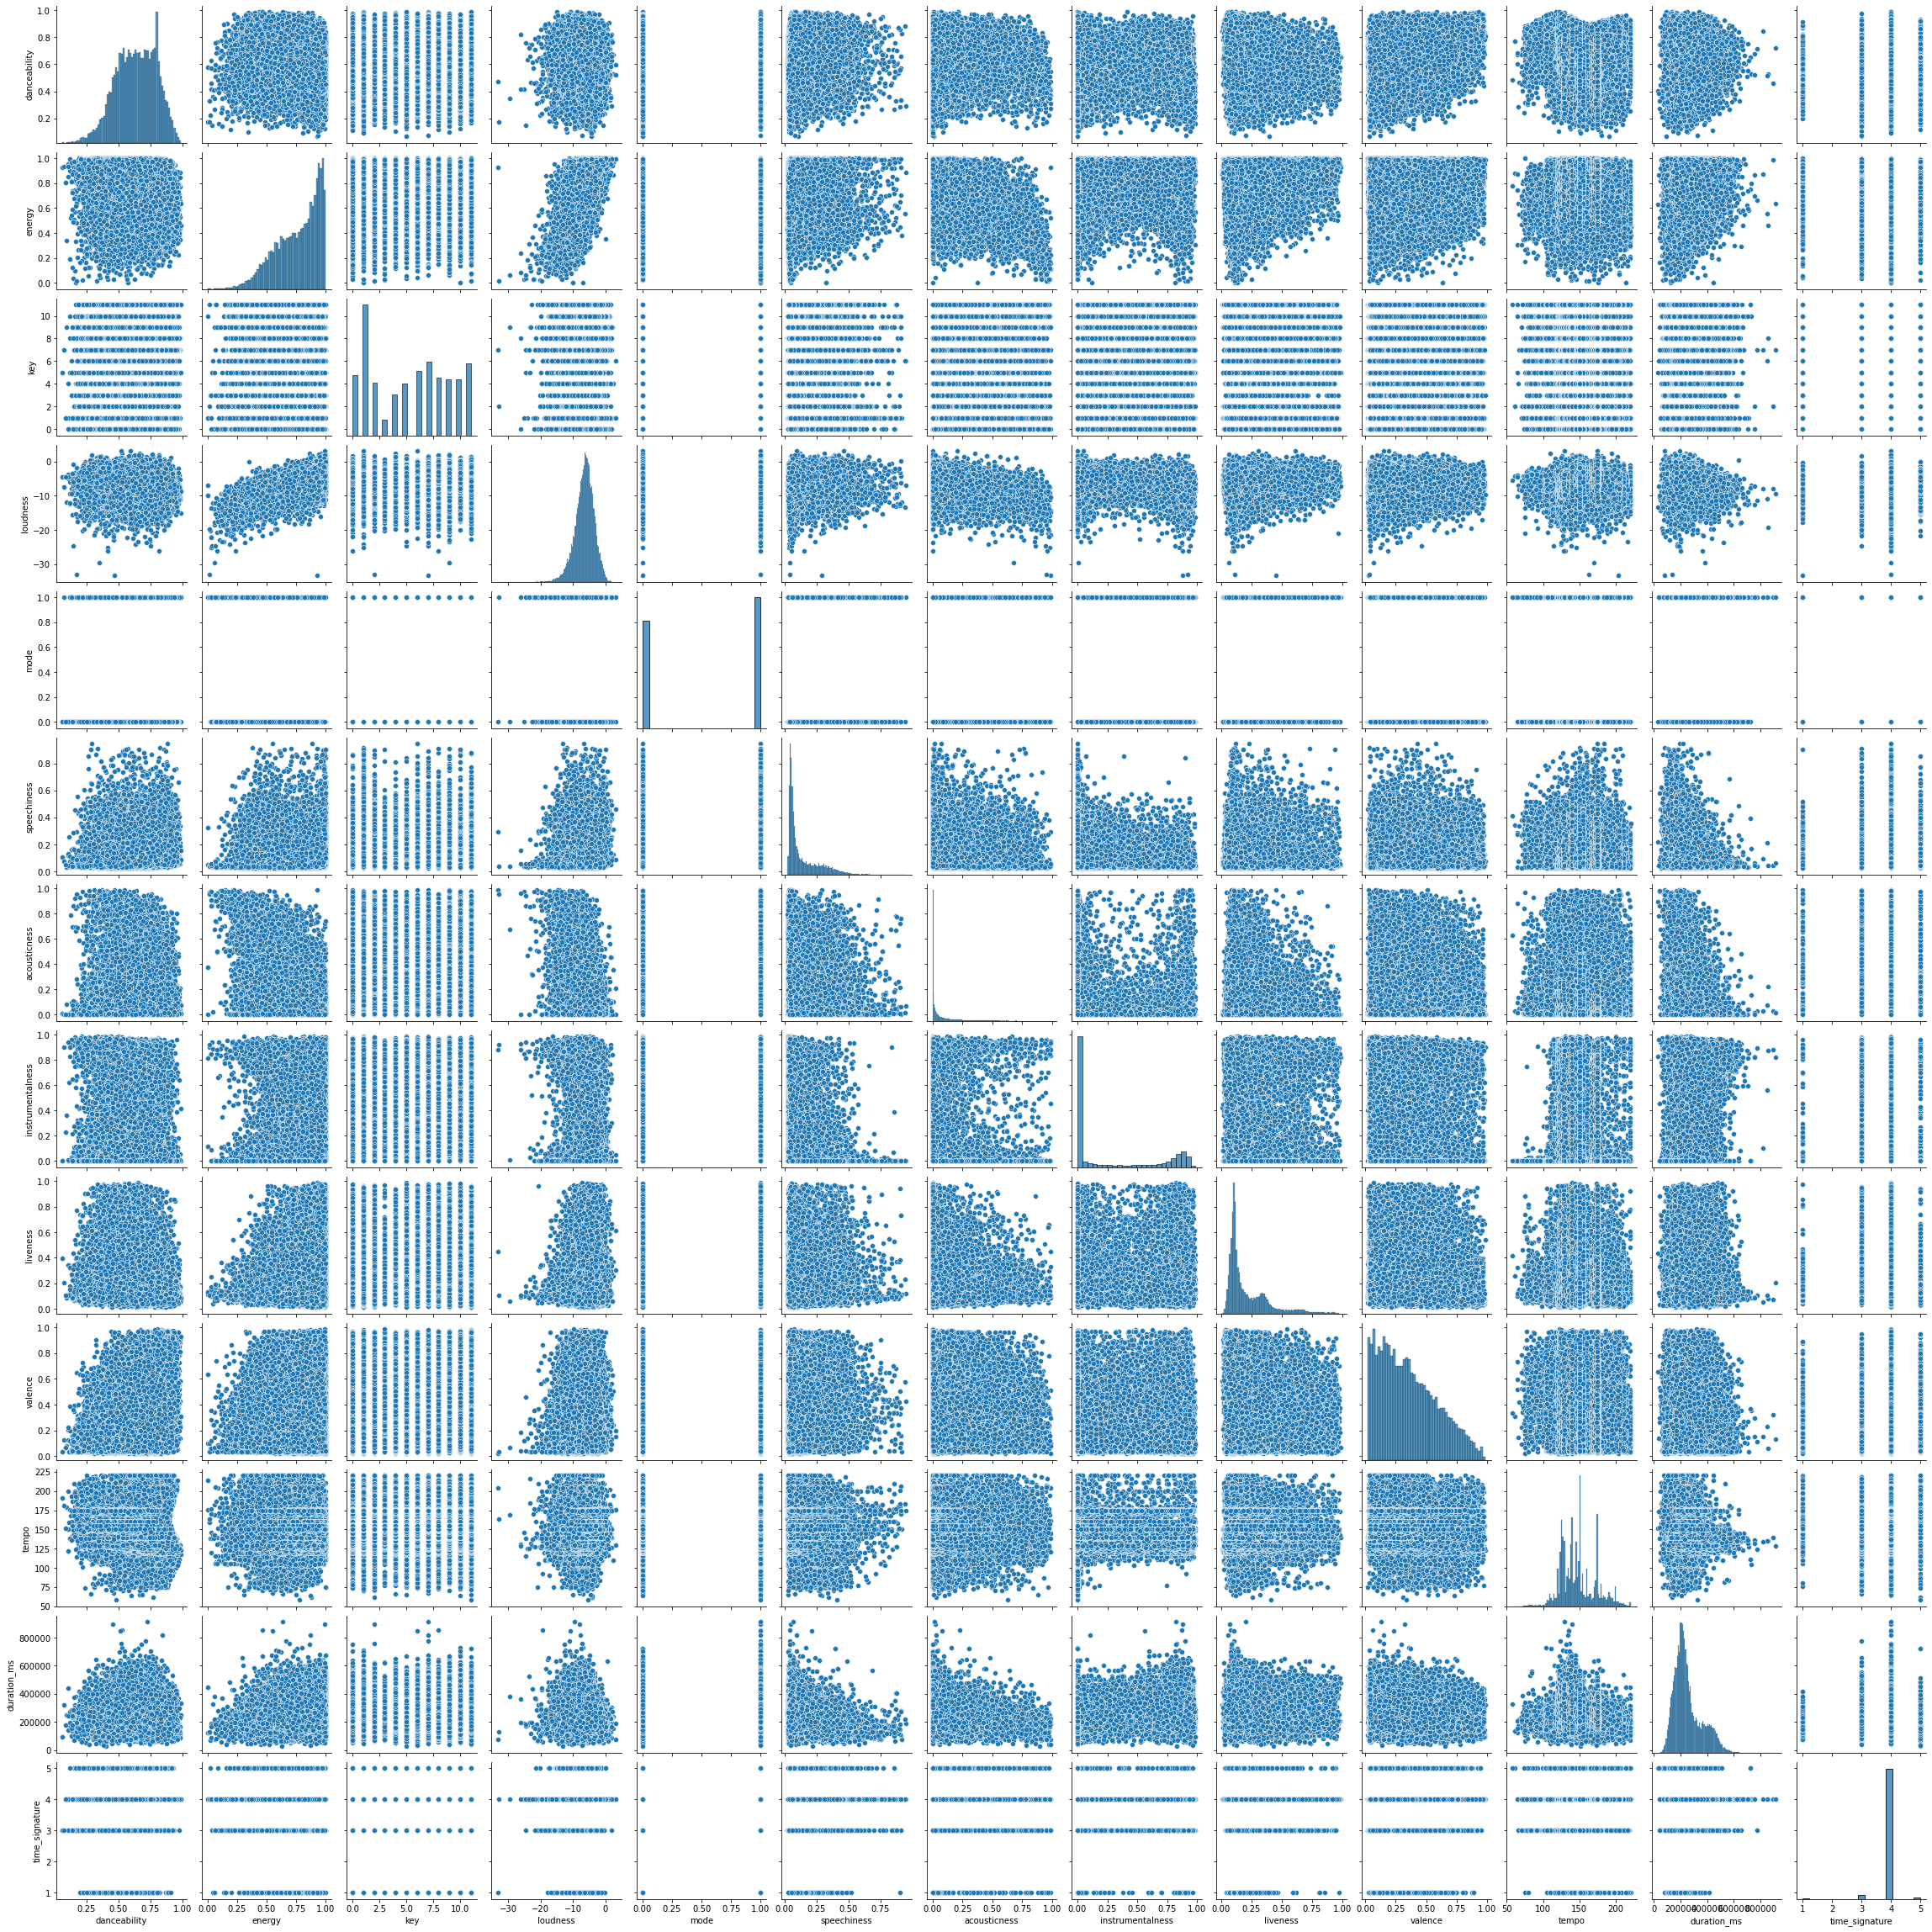

In [66]:
sns.pairplot(genres_data)

In [69]:
genres_data.corr()

danceability    energy       key  loudness      mode  \
danceability          1.000000 -0.323248 -0.012708 -0.216776  0.084413   
energy               -0.323248  1.000000  0.044731  0.601540 -0.032203   
key                  -0.012708  0.044731  1.000000 -0.006810 -0.248283   
loudness             -0.216776  0.601540 -0.006810  1.000000 -0.004744   
mode                  0.084413 -0.032203 -0.248283 -0.004744  1.000000   
speechiness           0.182177 -0.148363 -0.030634  0.048035  0.050260   
acousticness          0.069910 -0.497334 -0.004937 -0.283876 -0.014514   
instrumentalness     -0.067114  0.303875  0.068266 -0.187933 -0.016402   
liveness             -0.196702  0.231754  0.002753  0.167104  0.007280   
valence               0.369845 -0.013520  0.028600  0.080916  0.022208   
tempo                -0.165929 -0.024504 -0.009862  0.151610 -0.012191   
duration_ms          -0.049807  0.294464  0.069255 -0.095999 -0.031253   
time_signature        0.057711  0.039781  0.008061  0.047471 -0.009317   

                  speechiness  acousticness  instrumentalness  liveness  \
danceability         0.182177      0.069910         -0.067114 -0.196702   
energy              -0.148363     -0.497334          0.303875  0.231754   
key                 -0.030634     -0.004937          0.068266  0.002753   
loudness             0.048035     -0.283876         -0.187933  0.167104   
mode                 0.050260     -0.014514         -0.016402  0.007280   
speechiness          1.000000      0.160184         -0.386571  0.057432   
acousticness         0.160184      1.000000         -0.261896 -0.107229   
instrumentalness    -0.386571     -0.261896          1.000000 -0.015990   
liveness             0.057432     -0.107229         -0.015990  1.000000   
valence              0.218829      0.099328         -0.257068 -0.025156   
tempo                0.164674      0.055643         -0.207667  0.028327   
duration_ms         -0.309892     -0.246681          0.603784  0.010594   
time_signature       0.021637     -0.049791         -0.010164  0.003077   

                   valence     tempo  duration_ms  time_signature  
danceability      0.369845 -0.165929    -0.049807        0.057711  
energy           -0.013520 -0.024504     0.294464        0.039781  
key               0.028600 -0.009862     0.069255        0.008061  
loudness          0.080916  0.151610    -0.095999        0.047471  
mode              0.022208 -0.012191    -0.031253       -0.009317  
speechiness       0.218829  0.164674    -0.309892        0.021637  
acousticness      0.099328  0.055643    -0.246681       -0.049791  
instrumentalness -0.257068 -0.207667     0.603784       -0.010164  
liveness         -0.025156  0.028327     0.010594        0.003077  
valence           1.000000  0.058374    -0.191093        0.040308  
tempo             0.058374  1.000000    -0.156961       -0.019778  
duration_ms      -0.191093 -0.156961     1.000000        0.003040  
time_signature    0.040308 -0.019778     0.003040        1.000000

<AxesSubplot:>

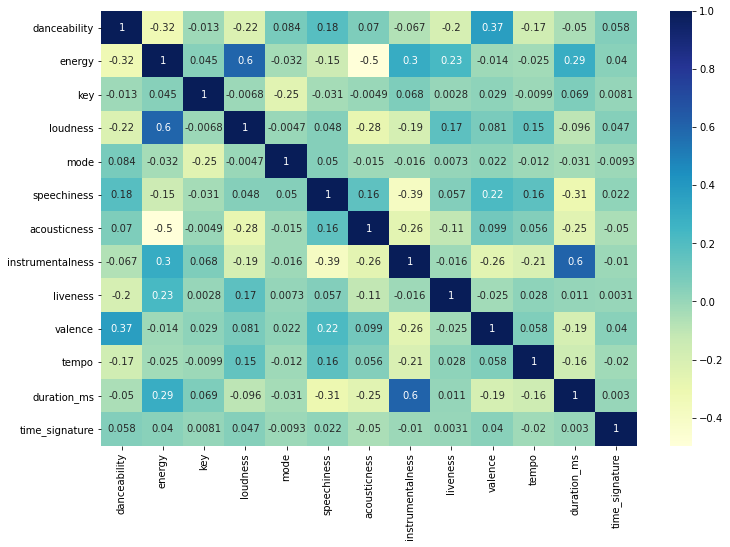

In [73]:
plt.figure(figsize=(12,8))
sns.heatmap(genres_data.corr(), annot=True, cmap="YlGnBu")

- Seems like enery and loudness are correlated
- instrumentalness and duration_ms are correlated

# Training a model

In [74]:
X = genres_data.drop('genre', axis=1)

In [75]:
y = genres_data['genre']

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [78]:
genres_data.count()

danceability        42305
energy              42305
key                 42305
loudness            42305
mode                42305
speechiness         42305
acousticness        42305
instrumentalness    42305
liveness            42305
valence             42305
tempo               42305
duration_ms         42305
time_signature      42305
genre               42305
dtype: int64

In [83]:
from sklearn.svm import SVC

In [84]:
model = SVC()

In [85]:
model.fit(X_train, y_train)

SVC()

# Model Evaluation

In [86]:
predictions = model.predict(X_test)

In [87]:
from sklearn.metrics import classification_report, confusion_matrix

In [88]:
print(confusion_matrix(y_test, predictions))

[[   0    0    0    0    0    0    0 1086  145    0    7    0   14    0
   315]
 [   0    0    0    0    0    0    0  274   52    0    3    0    3    0
   231]
 [   0    0    0    0    0    0    0  373  257    0    2    0   20    0
   334]
 [   0    0    0    0    0    0    0   79   13    0    1    0    0    0
    67]
 [   0    0    0    0    0    0    0  368   63    0    4    0    7    0
   151]
 [   0    0    0    0    0    0    0  253  135    0    2    0   10    0
   262]
 [   0    0    0    0    0    0    0  575   11    0    0    0    2    0
    39]
 [   0    0    0    0    0    0    0 1526  127    0    6    0    6    0
   305]
 [   0    0    0    0    0    0    0   72  600    0    7    0   90    0
   238]
 [   0    0    0    0    0    0    0  434  152    0    6    0   42    0
   323]
 [   0    0    0    0    0    0    0    6   39    0  707    0  237    0
    11]
 [   0    0    0    0    0    0    0  239  197    0   67    0  252    0
   189]
 [   0    0    0    0    0    0    0   1

In [89]:
print(classification_report(y_test, predictions))

                 precision    recall  f1-score   support

      Dark Trap       0.00      0.00      0.00      1567
            Emo       0.00      0.00      0.00       563
         Hiphop       0.00      0.00      0.00       986
            Pop       0.00      0.00      0.00       160
            Rap       0.00      0.00      0.00       593
            RnB       0.00      0.00      0.00       662
     Trap Metal       0.00      0.00      0.00       627
Underground Rap       0.26      0.77      0.39      1970
            dnb       0.27      0.60      0.37      1007
      hardstyle       0.00      0.00      0.00       957
      psytrance       0.55      0.71      0.62      1000
      techhouse       0.00      0.00      0.00       944
         techno       0.35      0.45      0.39       986
         trance       0.00      0.00      0.00       959
           trap       0.13      0.43      0.20       980

       accuracy                           0.27     13961
      macro avg       0.10   

/home/user/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Improving

Dropping 'duration_ms' column to test if the model improves

In [102]:
genres_data_2 = genres_data.drop('duration_ms', axis=1)

In [103]:
model_2 = SVC()

In [104]:
X = genres_data_2.drop('genre', axis=1)
y = genres_data_2['genre']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [105]:
model_2.fit(X_train, y_train)

SVC()

In [106]:
predictions = model_2.predict(X_test)

In [107]:
print(confusion_matrix(y_test, predictions))

[[ 27   0   5   0   1   0   0 648  81 104  93 309 160 123  16]
 [  2   0  18   0   0   0   0 100 134  91  16 136  11  43  12]
 [  4   0  34   0   1   0   0 436 213  51  16 171  18  34   8]
 [  0   0   4   0   0   0   0  54  24   9   5  47   3  12   2]
 [  3   0   2   0 133   0   0 137  34  34  34 133  28  46   9]
 [  4   0  12   0   0   0   0 299  98  39  13 140  21  34   2]
 [  7   0   9   0   2   0   0 185  65  74  29 136  26  72  22]
 [ 13   0  28   0   0   0   0 901 217 139  74 377 101  97  23]
 [  0   0   0   0   0   0   0  48 959   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0  81   0 842   2   0   0   0  31]
 [  0   0   0   0   0   0   0 286   0  89 409   0   9 182  25]
 [  0   0   0   0   0   0   0   2   0   0   0 877  64   1   0]
 [  2   0   0   0   0   0   0  30   0   0  19 287 558  90   0]
 [  1   0   0   0   0   0   0 115   0   0  68 117 151 506   1]
 [  0   0   0   0   0   0   0  38   0 376  89   0   0  22 455]]


In [108]:
print(classification_report(y_test, predictions))

                 precision    recall  f1-score   support

      Dark Trap       0.42      0.02      0.03      1567
            Emo       0.00      0.00      0.00       563
         Hiphop       0.30      0.03      0.06       986
            Pop       0.00      0.00      0.00       160
            Rap       0.97      0.22      0.36       593
            RnB       0.00      0.00      0.00       662
     Trap Metal       0.00      0.00      0.00       627
Underground Rap       0.27      0.46      0.34      1970
            dnb       0.53      0.95      0.68      1007
      hardstyle       0.46      0.88      0.60       957
      psytrance       0.47      0.41      0.44      1000
      techhouse       0.32      0.93      0.48       944
         techno       0.49      0.57      0.52       986
         trance       0.40      0.53      0.46       959
           trap       0.75      0.46      0.57       980

       accuracy                           0.41     13961
      macro avg       0.36   

/home/user/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot:xlabel='genre', ylabel='count'>

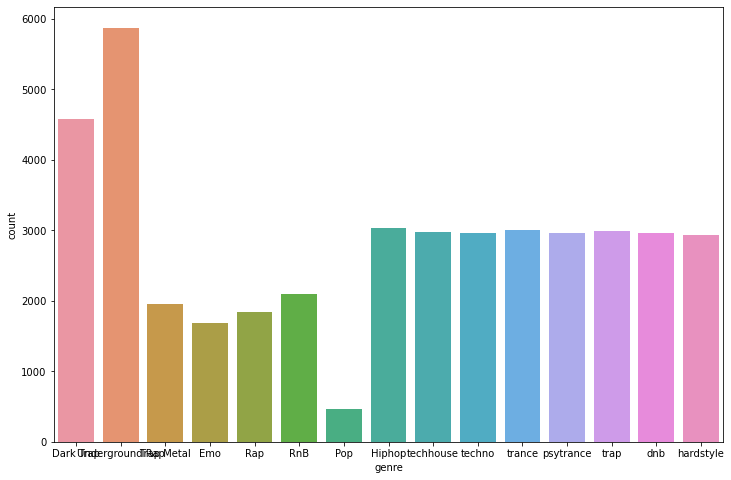

In [110]:
plt.figure(figsize=(12,8))
sns.countplot(x="genre", data=genres_data_2)

**Removing pop genre because too less data**

In [112]:
without_pop = genres_data_2[genres_data_2['genre'] != 'Pop']
without_pop.count()

danceability        41844
energy              41844
key                 41844
loudness            41844
mode                41844
speechiness         41844
acousticness        41844
instrumentalness    41844
liveness            41844
valence             41844
tempo               41844
time_signature      41844
genre               41844
dtype: int64

<AxesSubplot:xlabel='genre', ylabel='count'>

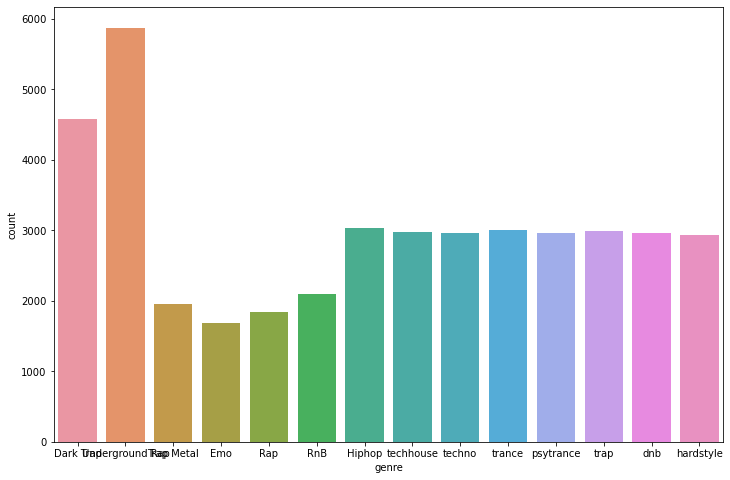

In [113]:
plt.figure(figsize=(12,8))
sns.countplot(x="genre", data=without_pop)

In [128]:
def train_and_validate_model(data):
    X = data.drop('genre', axis=1)
    y = data['genre']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    model = SVC()
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(confusion_matrix(y_test, predictions))
    print()
    print(classification_report(y_test, predictions))

In [130]:
train_and_validate_model(without_pop)

[[ 21   0   4   1   0   0 583  76  96  82 279 141 128  14]
 [  2   0  15   0   0   0  87 117  84  10 125  10  43   8]
 [  4   0  31   0   0   0 415 209  47  21 134  15  41   7]
 [  4   0   2 127   0   0 123  31  36  28 125  24  45   5]
 [  3   0  11   0   0   0 244  77  41  11 128  25  29   1]
 [  6   0   7   1   0   0 157  63  66  24 125  25  72  22]
 [ 10   0  29   0   0   0 806 196 128  67 347  89 104  19]
 [  0   0   0   0   0   0  47 838   0   0   0   0   0   0]
 [  1   0   0   0   0   0  70   0 781   3   0   0   0  34]
 [  0   0   0   0   0   0 215   0  81 395   1  10 187  21]
 [  0   0   0   0   0   0   1   0   0   0 835  58   1   0]
 [  1   0   0   0   0   0  25   0   0  16 264 516  84   0]
 [  1   0   0   0   0   0  77   0   0  61 112 144 468   0]
 [  1   0   0   0   0   0  36   0 316  69   0   0  32 419]]

                 precision    recall  f1-score   support

      Dark Trap       0.39      0.01      0.03      1425
            Emo       0.00      0.00      0.00       501


/home/user/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Removing outliers**

<AxesSubplot:xlabel='genre', ylabel='count'>

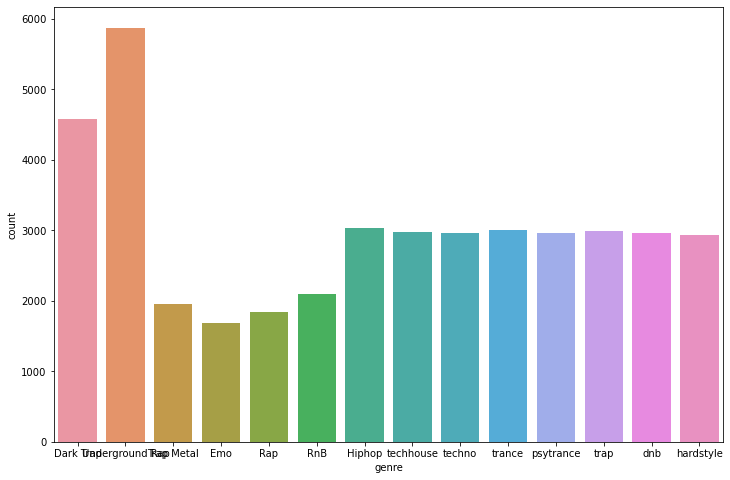

In [131]:
plt.figure(figsize=(12,8))
sns.countplot(x="genre", data=without_pop)

In [132]:
without_outliers = without_pop[without_pop['genre'] != 'Emo']

In [133]:
without_outliers = without_outliers[without_outliers['genre'] != 'Rap']

In [134]:
without_outliers = without_outliers[without_outliers['genre'] != 'RnB']

In [135]:
without_outliers = without_outliers[without_outliers['genre'] != 'Metal']

In [136]:
without_outliers = without_outliers[without_outliers['genre'] != 'Dark Trap']

In [137]:
without_outliers = without_outliers[without_outliers['genre'] != 'Underground Rap']

In [138]:
without_outliers = without_outliers[without_outliers['genre'] != 'Trap Metal']

<AxesSubplot:xlabel='genre', ylabel='count'>

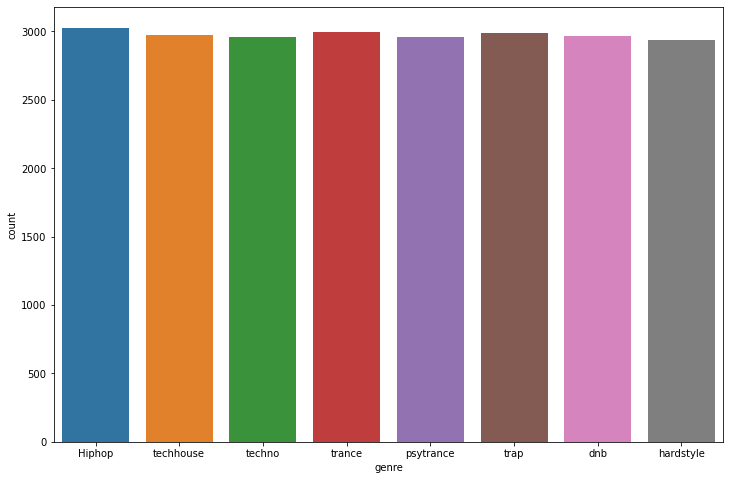

In [139]:
plt.figure(figsize=(12,8))
sns.countplot(x="genre", data=without_outliers)

In [140]:
train_and_validate_model(without_outliers)

[[279 271  98  47 125  14  46   4]
 [ 13 897   0   0   0   0   0   0]
 [  0   0 841   2   0   0   0  38]
 [  1   0 126 507   2   6 210  18]
 [  0   0   0   0 818  75   1   0]
 [  0   0   0  24 256 511  98   0]
 [  0   0   0 119 108 167 522   1]
 [  0   0 360 102   0   0  39 397]]

              precision    recall  f1-score   support

      Hiphop       0.95      0.32      0.47       884
         dnb       0.77      0.99      0.86       910
   hardstyle       0.59      0.95      0.73       881
   psytrance       0.63      0.58      0.61       870
   techhouse       0.62      0.91      0.74       894
      techno       0.66      0.57      0.61       889
      trance       0.57      0.57      0.57       917
        trap       0.87      0.44      0.59       898

    accuracy                           0.67      7143
   macro avg       0.71      0.67      0.65      7143
weighted avg       0.71      0.67      0.65      7143

